# Download Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install the Libraries


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.1 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 186 kB 49.4 MB/s 
     |████████████████████████████████| 1.2 MB 30.3 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 51 kB 296 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import*
import fastai; fastai.__version__

'2.5.2'

# Load Images and Display


In [ ]:
path = '.'
dls = ImageDataLoaders.from_folder(
    path, train = 'train', valid = 'val',bs = 32,
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)],
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


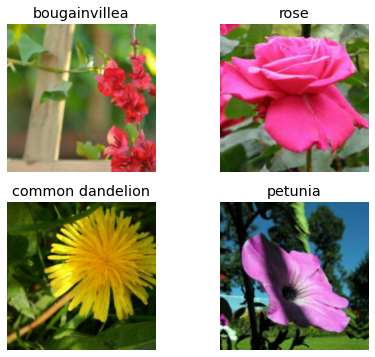

In [ ]:
dls.show_batch(max_n=4, figsize=(7,6)) # Display some samples 

# Training and Testing 

In [ ]:
learn = cnn_learner(dls,resnet34, metrics=[accuracy]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Finding best learning Rate

SuggestedLRs(valley=0.002511886414140463)

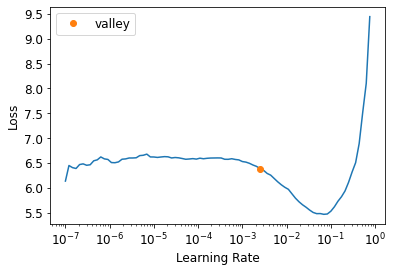

In [ ]:
learn.lr_find()
#learn.recorder.plot(suggestions=True)

In [ ]:
learn.fit_one_cycle(10,0.0025)

epoch,train_loss,valid_loss,accuracy,time
0,2.332573,1.385492,0.651940,03:30
1,1.282662,0.991678,0.740302,03:30
2,1.147703,0.888942,0.766972,03:29
3,0.990061,0.874225,0.769397,03:30
4,0.800819,0.768237,0.806573,03:29
5,0.666079,0.671566,0.828664,03:30
6,0.551651,0.605218,0.842403,03:30
7,0.457877,0.615167,0.841056,03:30
8,0.403471,0.591094,0.849407,03:30
9,0.399997,0.548326,0.858028,03:31


In [ ]:
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
    
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

# Plotting Losses

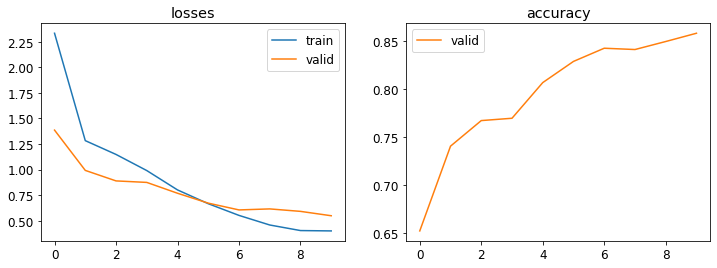

In [ ]:
learn.recorder.plot_metrics()

# Plotting Confusion Matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

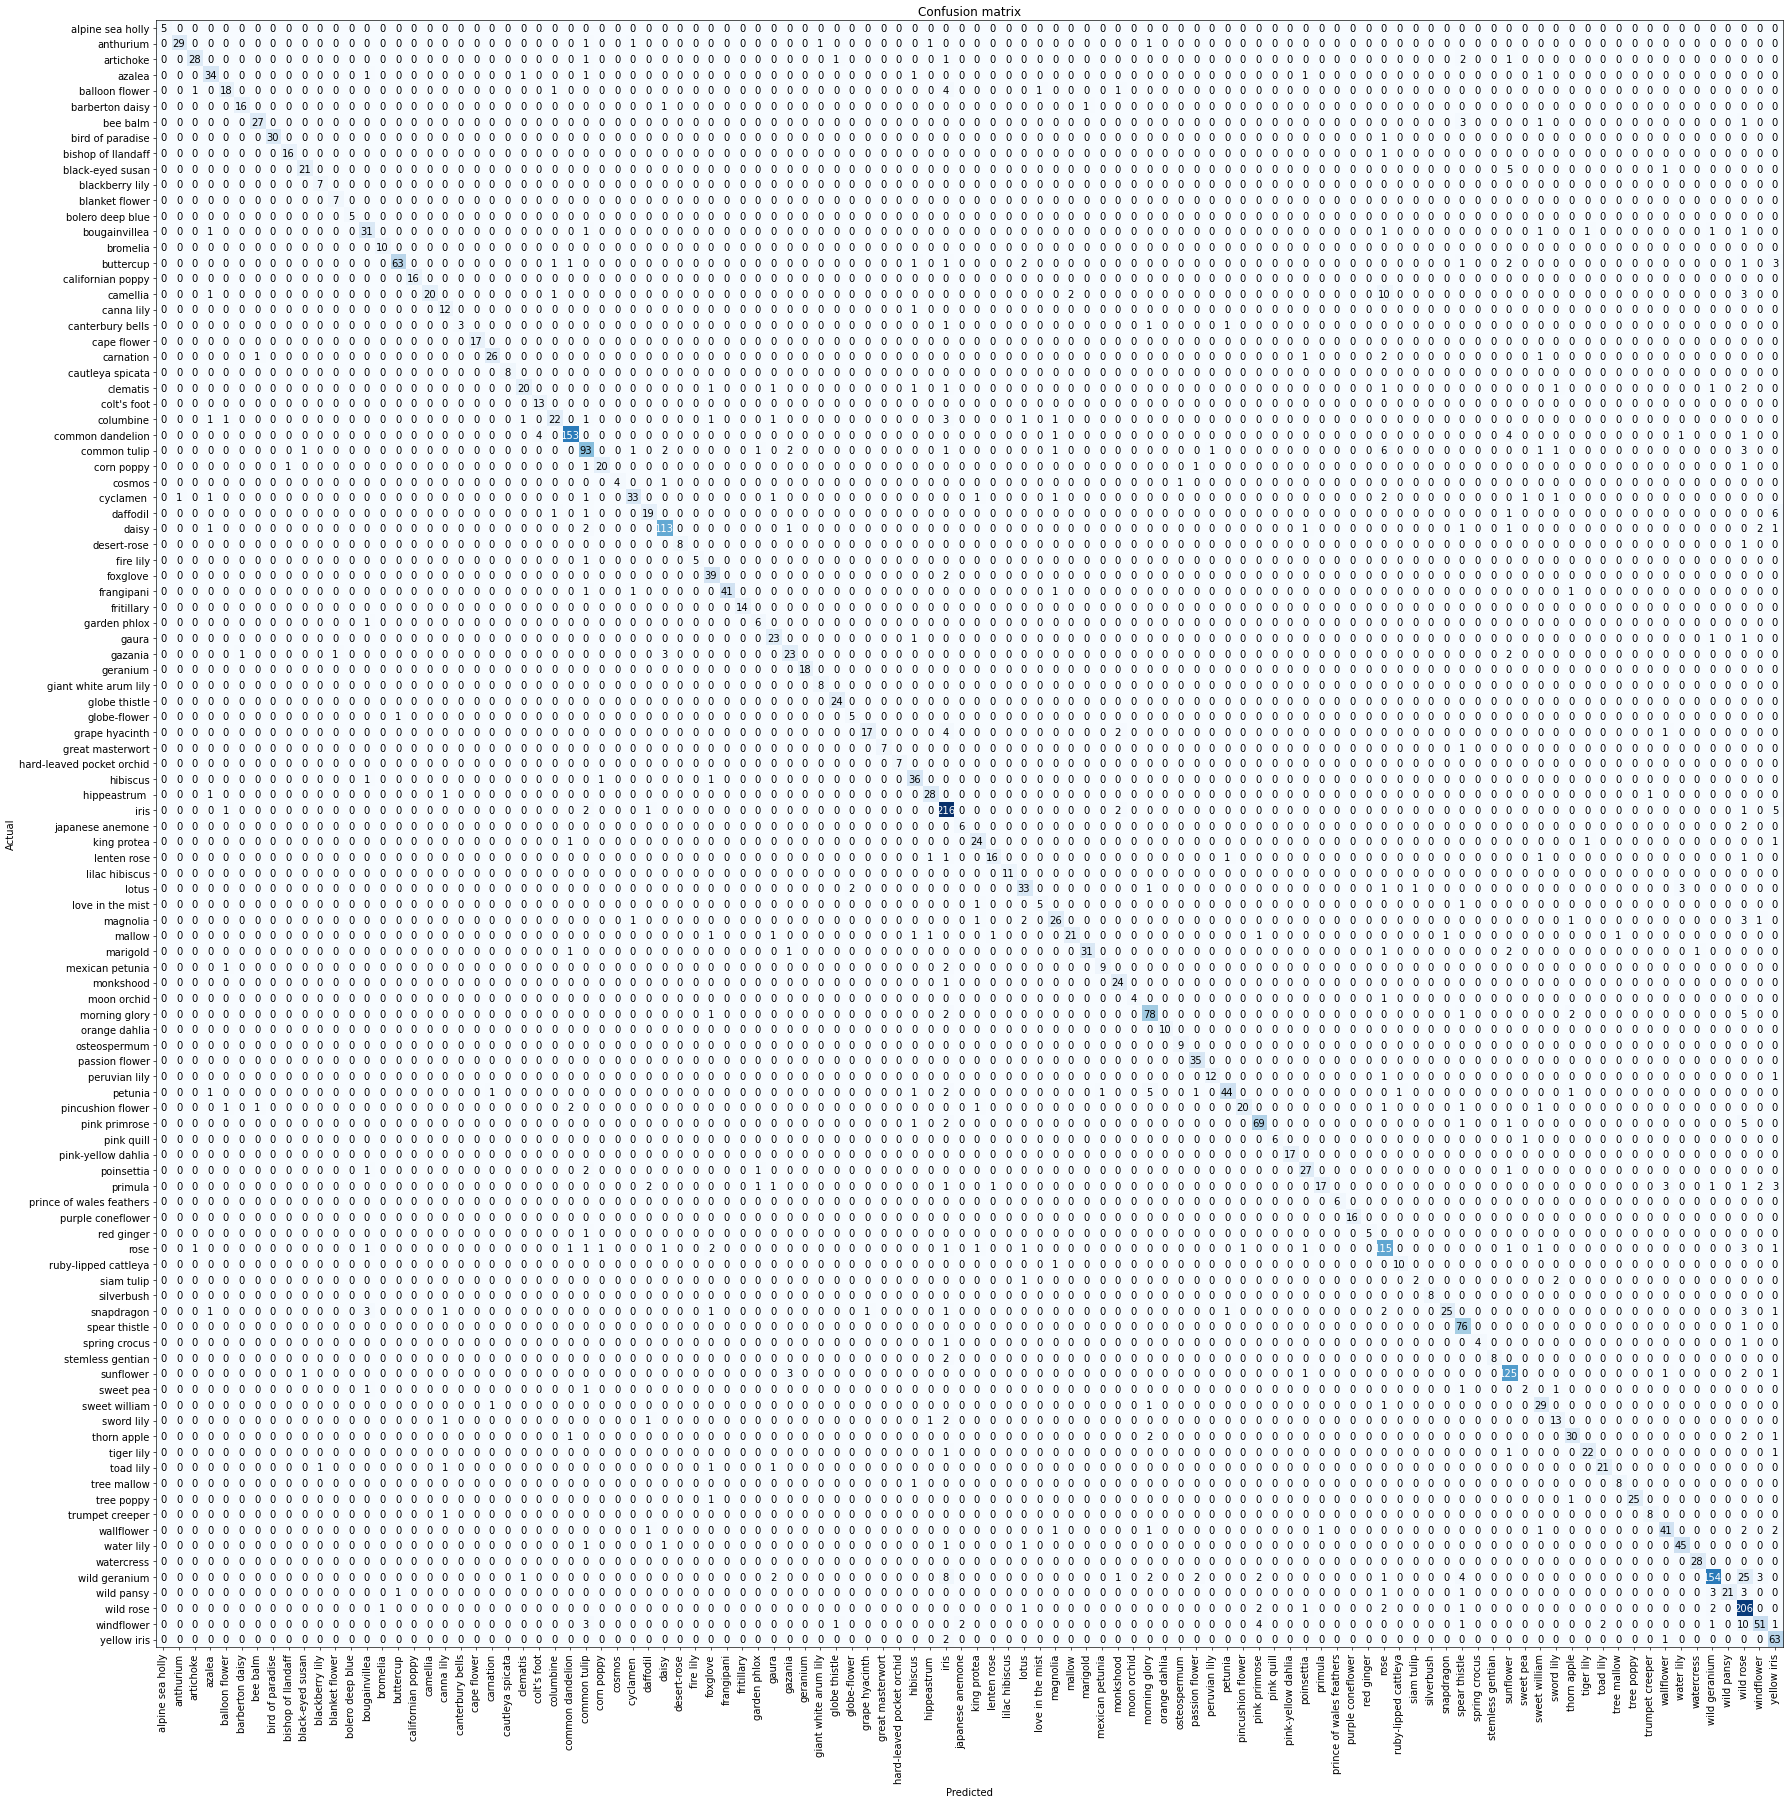

In [ ]:
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

# Plotting the Top losses 

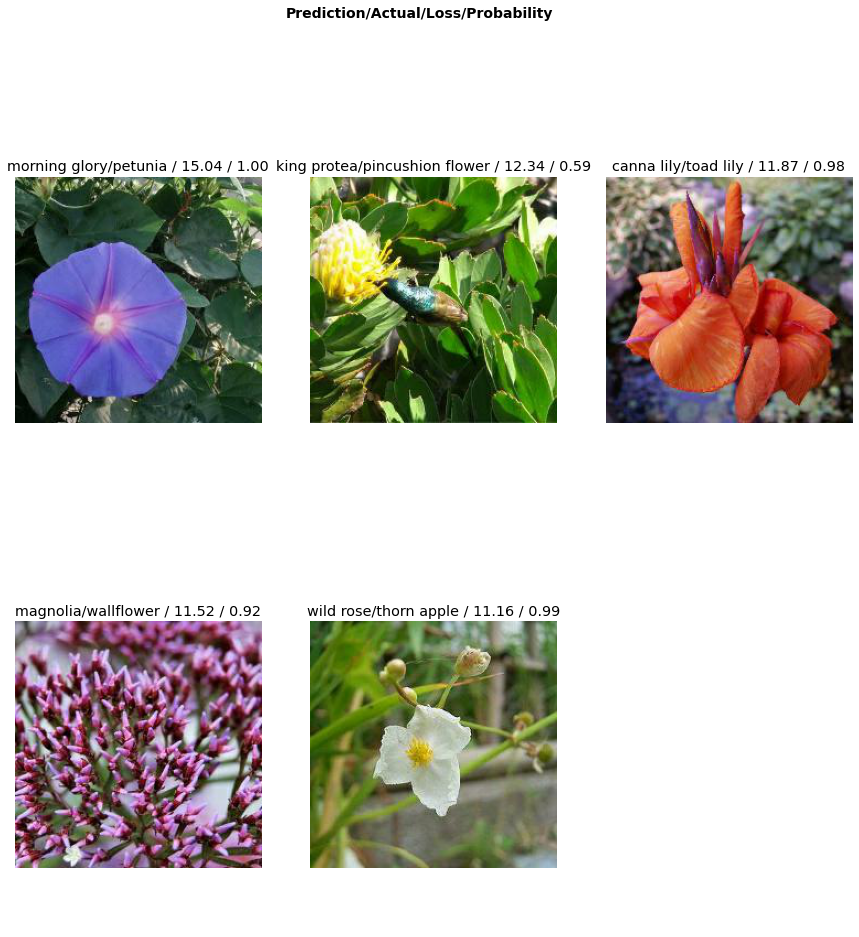

In [ ]:
interp.plot_top_losses(5, figsize=(15,15))